Coordinates of points forming Triangle ABC: [0.26071605 0.43635845] [0.21315735 0.274245  ] [0.10056103 0.27951775]
Coordinates of points forming Triangle CDA: [0.10056103 0.27951775] [0.20634391 0.44272557] [0.26071605 0.43635845]
Point y is inside Triangle ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
Point y is not inside Triangle CDA.


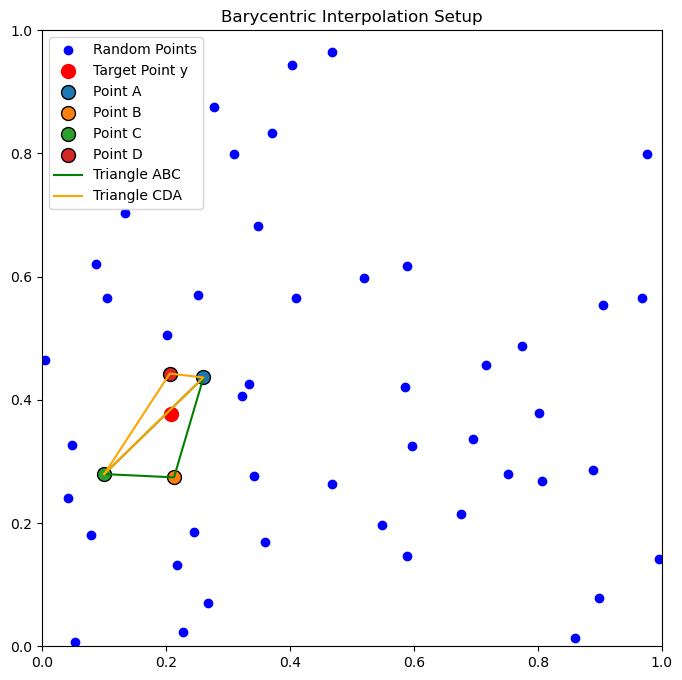

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from Problem3 import Problem  # Ensure this matches the actual filename

model = Problem()

# Generate random points and a target point
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))  # 50 random points
y = rng.uniform(size=(2,))     # Target point

# Identify points A, B, C, and D based on specific conditions
points = {
    'A': model.find_closest_point(X, y, lambda pt, y: pt[0] > y[0] and pt[1] > y[1]),
    'B': model.find_closest_point(X, y, lambda pt, y: pt[0] > y[0] and pt[1] < y[1]),
    'C': model.find_closest_point(X, y, lambda pt, y: pt[0] < y[0] and pt[1] < y[1]),
    'D': model.find_closest_point(X, y, lambda pt, y: pt[0] < y[0] and pt[1] > y[1])
}

# Calculate barycentric coordinates
coords_abc = model.point_in_triangle(points['A'], points['B'], points['C'], y) if all(points.get(k) is not None for k in ['A', 'B', 'C']) else None
coords_cda = model.point_in_triangle(points['C'], points['D'], points['A'], y) if all(points.get(k) is not None for k in ['C', 'D', 'A']) else None

# Output point information
print("Coordinates of points forming Triangle ABC:", points['A'], points['B'], points['C'])
print("Coordinates of points forming Triangle CDA:", points['C'], points['D'], points['A'])

if coords_abc:
    print("Point y is inside Triangle ABC:", coords_abc)
else:
    print("Point y is not inside Triangle ABC.")

if coords_cda:
    print("Point y is inside Triangle CDA:", coords_cda)
else:
    print("Point y is not inside Triangle CDA.")

# Plotting setup
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], color='blue', label='Random Points')
ax.scatter(y[0], y[1], color='red', label='Target Point y', s=100)
for key, pt in points.items():
    if pt is not None:
        ax.scatter(pt[0], pt[1], label=f'Point {key}', s=100, edgecolors='black')

# Draw triangles if all points are available
if all(points.get(key) is not None for key in ['A', 'B', 'C']):
    model.draw_triangle(ax, points, ['A', 'B', 'C'], 'green', 'Triangle ABC')
if all(points.get(key) is not None for key in ['C', 'D', 'A']):
    model.draw_triangle(ax, points, ['C', 'D', 'A'], 'orange', 'Triangle CDA')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title("Barycentric Interpolation Setup")
ax.legend()
plt.show()


# Q.3

In [13]:
import numpy as np


# Instantiate the model
model = Problem()

# Generate random points and a target point
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))  # Generate random points
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])  # Calculate function values for X

y = rng.uniform(size=(2,))  # Target point

# Identify points A, B, C, and D based on specific conditions
indices = {
    'A': model.find_closest_point_index(X, y, lambda pt, y: pt[0] > y[0] and pt[1] > y[1]),
    'B': model.find_closest_point_index(X, y, lambda pt, y: pt[0] > y[0] and pt[1] < y[1]),
    'C': model.find_closest_point_index(X, y, lambda pt, y: pt[0] < y[0] and pt[1] < y[1]),
    'D': model.find_closest_point_index(X, y, lambda pt, y: pt[0] < y[0] and pt[1] > y[1])
}

if all(idx is not None for idx in indices.values()):
    points = {key: X[idx] for key, idx in indices.items()}
    values = {key: F[idx] for key, idx in indices.items()}

    coords_abc = model.point_in_triangle(points['A'], points['B'], points['C'], y)
    if coords_abc:
        f_approx = model.approximate_value(coords_abc, [values['A'], values['B'], values['C']])
        print(f"Approximated value at {y}: {f_approx} (Actual: {f(y)})")
    else:
        print("Point y is not inside the triangle ABC or coordinates couldn't be computed.")
else:
    print("Not all points (A, B, C, D) could be found.")



Approximated value at [0.20901926 0.37774759]: 0.08405201731052576 (Actual: 0.0789565216259594)


# Q.4

In [20]:
import numpy as np


# Instantiate the model
model = Problem()

def main():
    rng = np.random.default_rng(2024)
    X = rng.uniform(size=(50, 2))  # Generate random points
    f = lambda x: x[0] * x[1]
    F = np.array([f(x) for x in X])  # Calculate function values for X
    
    Y = np.array([
        [0.2, 0.2],
        [0.8, 0.2],
        [0.8, 0.8],
        [0.8, 0.2],
        [0.5, 0.5]
    ])
    
    # Calculate the nearest points A, B, C, D
    points = {
        'A': np.array([0.6, 0.7]),
        'B': np.array([0.6, 0.3]),
        'C': np.array([0.3, 0.3]),
        'D': np.array([0.3, 0.7])
    }
    
    for y in Y:
        coords_abc = model.barycentric_coordinates(points['A'], points['B'], points['C'], y)
        coords_cda = model.barycentric_coordinates(points['C'], points['D'], points['A'], y)
        
        f_actual = f(y)
        
        if coords_abc:
            f_approx_abc = model.approximate_value(coords_abc, [f(points['A']), f(points['B']), f(points['C'])])
            print(f"Approximation at {y} using triangle ABC: {f_approx_abc} (Actual: {f_actual})")
        if coords_cda:
            f_approx_cda = model.approximate_value(coords_cda, [f(points['C']), f(points['D']), f(points['A'])])
            print(f"Approximation at {y} using triangle CDA: {f_approx_cda} (Actual: {f_actual})")

if __name__ == "__main__":
    main()


AttributeError: 'Problem' object has no attribute 'barycentric_coordinates'